The conjugate function, $f^*$, of some function $f$ is as follows
$$
f^*(y) = \sup_{x\in \text{dom}f}\left( y^Tx - f(x)\right)
$$

Below we demonstrate this graphically.

In [4]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import numpy as np

from matplotlib.widgets import Button, Slider

plt.style.use('bmh')

# 1D Case
$$f:\mathbb R \to \mathbb R$$

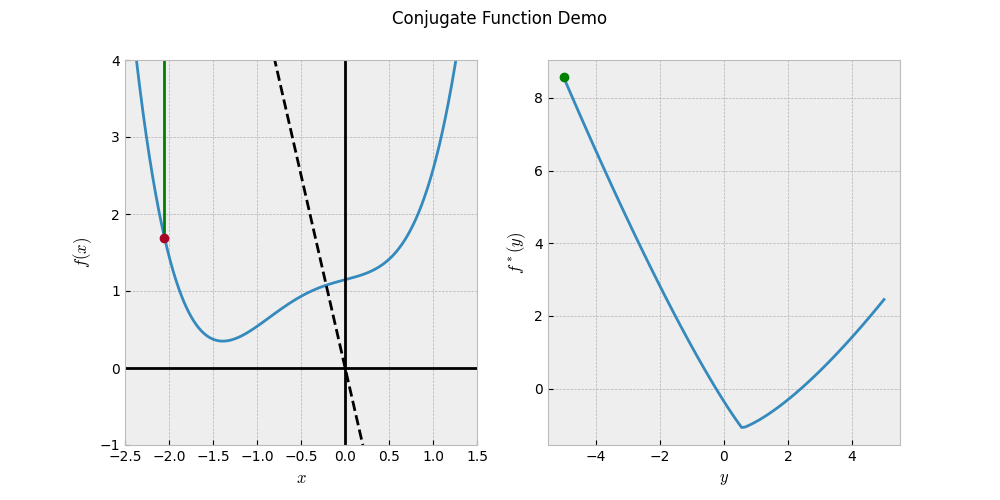

In [7]:
np.random.seed(1)
polynomial_order = 4
coefficients = np.random.rand(polynomial_order + 1) 
x_samples = 1000
y_samples = 100
x = np.linspace(-2.5, 1.5, x_samples)
f = np.polyval(coefficients, x) + 1
y = np.linspace(-5, 5, y_samples)

f_conjugate = np.max(y[:,None] * x[None,:] - f[None,:], axis=1)

idx_init = 0
point_idx = np.argmax(y[idx_init] * x - f)

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axs[0].plot(x, f)
axs[0].set_xlim([-2.5,1.5])
axs[0].set_ylim([-1, 4])
axs[0].axhline(0, color='k')
axs[0].axvline(0, color='k')

linear, = axs[0].plot(x, y[idx_init] * x, 'k--')
distance, = axs[0].plot([x[point_idx], x[point_idx]], [f[point_idx], y[idx_init] * x[point_idx]], 'g')
point, = axs[0].plot(x[point_idx], f[point_idx], 'o')

axs[1].plot(y, f_conjugate)
conj_point, = axs[1].plot(y[idx_init], f_conjugate[idx_init], 'og')

axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f(x)$")
axs[1].set_xlabel("$y$")
axs[1].set_ylabel("$f^*(y)$")

fig.suptitle("Conjugate Function Demo")

def animate(i):
    point_idx = np.argmax(y[i] * x - f)
    linear.set_data(x, y[i] * x)
    distance.set_data([x[point_idx], x[point_idx]], [f[point_idx], y[i] * x[point_idx]])
    point.set_data(x[point_idx], f[point_idx])
    conj_point.set_data(y[i], f_conjugate[i])
    return linear, distance, point, conj_point

anim = ani.FuncAnimation(fig, animate, frames=y_samples, interval=1/60*1000, blit=True)


# 2D Case
$$f:\mathbb R^2 \to \mathbb R$$

0

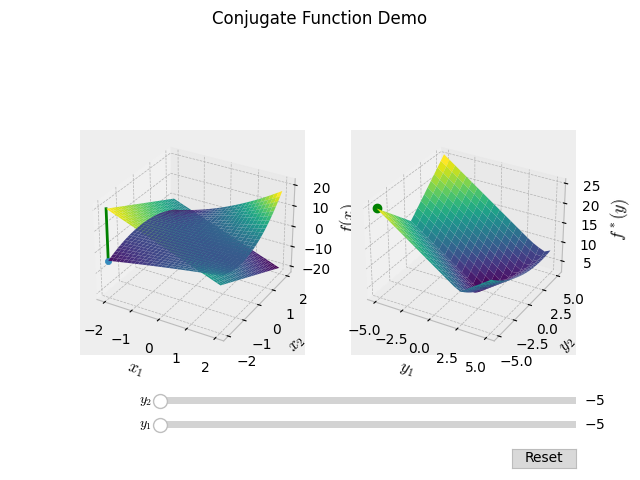

In [8]:
import matplotlib.pyplot as plt
np.random.seed(3)
polynomial_order = 2
coefficients = np.random.rand((polynomial_order + 1)**2).reshape((polynomial_order + 1, polynomial_order + 1))
x_samples = 30
x1 = np.linspace(-2, 2, x_samples)
x2 = np.linspace(-2, 2, x_samples)
X1, X2 = np.meshgrid(x1, x2)
X = np.array([[X1, X2]]).transpose(2, 3, 1, 0)
f = np.polynomial.polynomial.polyval2d(X1, X2, coefficients)

y_samples = 20
y1 = np.linspace(-5, 5, y_samples)
y2 = np.linspace(-5, 5, y_samples)
Y1, Y2 = np.meshgrid(y1, y2)
YT = np.array([[Y1, Y2]]).transpose(2, 3, 0, 1)
f_conjugate = np.max(np.squeeze(YT[:,:,None,None,:,:] @ X[None,None,:,:,:,:]) - f[None, None, :, :], axis=(2,3))

fig_3d = plt.figure()
ax_3d_x = fig_3d.add_subplot(1,2,1, projection='3d')
ax_3d_x.plot_surface(X1, X2, f, cmap='viridis')

idx_init = (0,0)
check_values = (np.squeeze(YT[idx_init[0],idx_init[1],:,:] @ X) - f)
point_idx = np.unravel_index(np.argmax(check_values), check_values.shape)

linear_3d = ax_3d_x.plot_surface(X1, X2, np.squeeze(YT[idx_init[0],idx_init[1],:,:] @ X), cmap="viridis")
distance_3d, = ax_3d_x.plot([X1[point_idx], X1[point_idx]], [X2[point_idx], X2[point_idx]], [f[point_idx], np.squeeze(YT[idx_init[0], idx_init[1], :,:] @ X[point_idx[0], point_idx[1], :,:])], 'g')
point_3d = ax_3d_x.scatter(X1[point_idx], X2[point_idx], f[point_idx])
zlims = ax_3d_x.get_zlim()

ax_3d_y = fig_3d.add_subplot(1,2,2,projection='3d')
ax_3d_y.plot_surface(Y1, Y2, f_conjugate, cmap='viridis')
conj_point_3d, = ax_3d_y.plot(Y1[idx_init], Y2[idx_init], f_conjugate[idx_init], 'og')

ax_3d_x.set_xlabel("$x_1$")
ax_3d_x.set_ylabel("$x_2$")
ax_3d_x.set_zlabel("$f(x)$")
ax_3d_y.set_xlabel("$y_1$")
ax_3d_y.set_ylabel("$y_2$")
ax_3d_y.set_zlabel("$f^*(y)$")

fig_3d.suptitle("Conjugate Function Demo")
ax_y1 = fig_3d.add_axes([0.25, 0.1, 0.65, 0.03])
slider_y1 = Slider(
    ax_y1, "$y_1$", min(y1), max(y1), valinit=y1[0], valstep=y1
)

ax_y2 = fig_3d.add_axes([0.25, 0.15, 0.65, 0.03])
slider_y2 = Slider(
    ax_y2, "$y_2$", min(y2), max(y2), valinit=y2[0], valstep=y2
)

def update(val):
    values = (slider_y2.val, slider_y1.val)
    i_3d = (np.argmin(np.abs(y1 - values[0])), np.argmin(np.abs(y2 - values[1])))
    check_values = np.squeeze(YT[i_3d[0], i_3d[1], :, :] @ X) - f
    point_idx = np.unravel_index(np.argmax(check_values), check_values.shape)

    conj_point_3d.set_data([Y1[i_3d]], [Y2[i_3d]])
    conj_point_3d.set_3d_properties(f_conjugate[i_3d])
    ax_3d_x.cla()
    ax_3d_x.plot_surface(X1, X2, f, cmap='viridis')

    # for some reason setting data glitches out
    linear_3d = ax_3d_x.plot_surface(X1, X2, np.squeeze(YT[i_3d[0], i_3d[1], :, :] @ X), cmap="viridis")
    distance_3d, = ax_3d_x.plot([X1[point_idx], X1[point_idx]], [X2[point_idx], X2[point_idx]], [f[point_idx], np.squeeze(YT[i_3d[0], i_3d[1], :,:] @ X[point_idx[0], point_idx[1], :,:])], 'g')
    point_3d = ax_3d_x.scatter(X1[point_idx], X2[point_idx], f[point_idx])
    ax_3d_x.set_xlabel("$x_1$")
    ax_3d_x.set_ylabel("$x_2$")
    ax_3d_x.set_zlabel("$f(x)$")
    ax_3d_x.set_zlim(zlims)


slider_y1.on_changed(update)
slider_y2.on_changed(update)

ax_reset = fig_3d.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(ax_reset, 'Reset', hovercolor='0.975')

def reset(event):
    slider_y1.reset()
    slider_y2.reset()
button.on_clicked(reset)